In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("ecommerce_customer_data_large.csv")

In [4]:
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,2773,Credit Card,27,NaN,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.0,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,2175,Cash,27,NaN,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.0,Lauren Johnson,27,Female,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [30]:
df = df.drop(["Customer Age"], axis=1)

KeyError: "['Customer Age'] not found in axis"

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

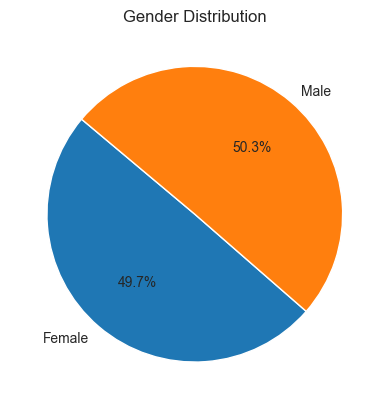

In [9]:
filter_df = df.dropna(subset=["Returns"])
return_distribution = filter_df.groupby('Gender')['Returns'].size()
# return_distribution.sum
# # gender_distribution
plt.plot(figsize=(6, 6))
plt.pie(return_distribution, labels=return_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

In [10]:
df["Returns"].fillna(0, inplace=True)

In [11]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

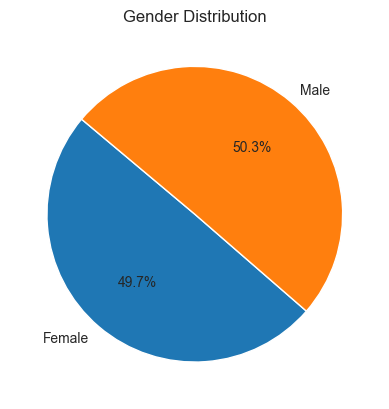

In [12]:
return_distribution = df.groupby('Gender')['Returns'].size()
# return_distribution.sum
# gender_distribution
plt.plot(figsize=(6, 6))
plt.pie(return_distribution, labels=return_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

In [13]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,0.0,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,1.0,Melissa Fernandez,64,Male,0


In [14]:
# df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
# 
# df["Purchase Date"] = df["Purchase Date"].dt.year
# df

In [15]:
# df["Purchase Date"] = df.datetime.astype('int64')
# df

In [16]:
df["Total Purchase Amount"] = df["Product Price"] * df["Quantity"]
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,436,Cash,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,233,Credit Card,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,2205,Cash,0.0,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,88,Cash,1.0,Melissa Fernandez,64,Male,0


In [17]:
df.to_csv("preprocess_ecommerce_customer_data.csv", index=False)

In [18]:
df = pd.read_csv("preprocess_ecommerce_customer_data.csv")
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,436,Cash,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,233,Credit Card,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,2205,Cash,0.0,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,88,Cash,1.0,Melissa Fernandez,64,Male,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Returns                250000 non-null  float64
 8   Customer Name          250000 non-null  object 
 9   Age                    250000 non-null  int64  
 10  Gender                 250000 non-null  object 
 11  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 22.9+ MB


In [31]:
df.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [20]:
df.nunique()

Customer ID               49661
Purchase Date            249728
Product Category              4
Product Price               491
Quantity                      5
Total Purchase Amount      1459
Payment Method                3
Returns                       2
Customer Name             39878
Age                          53
Gender                        2
Churn                         2
dtype: int64

In [21]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,765.954660,0.405904,43.798276,0.20052
std,14412.515718,141.738104,1.414737,593.494204,0.491067,15.364915,0.40039
min,1.000000,10.000000,1.000000,10.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,288.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,604.000000,0.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,1135.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,2500.000000,1.000000,70.000000,1.00000


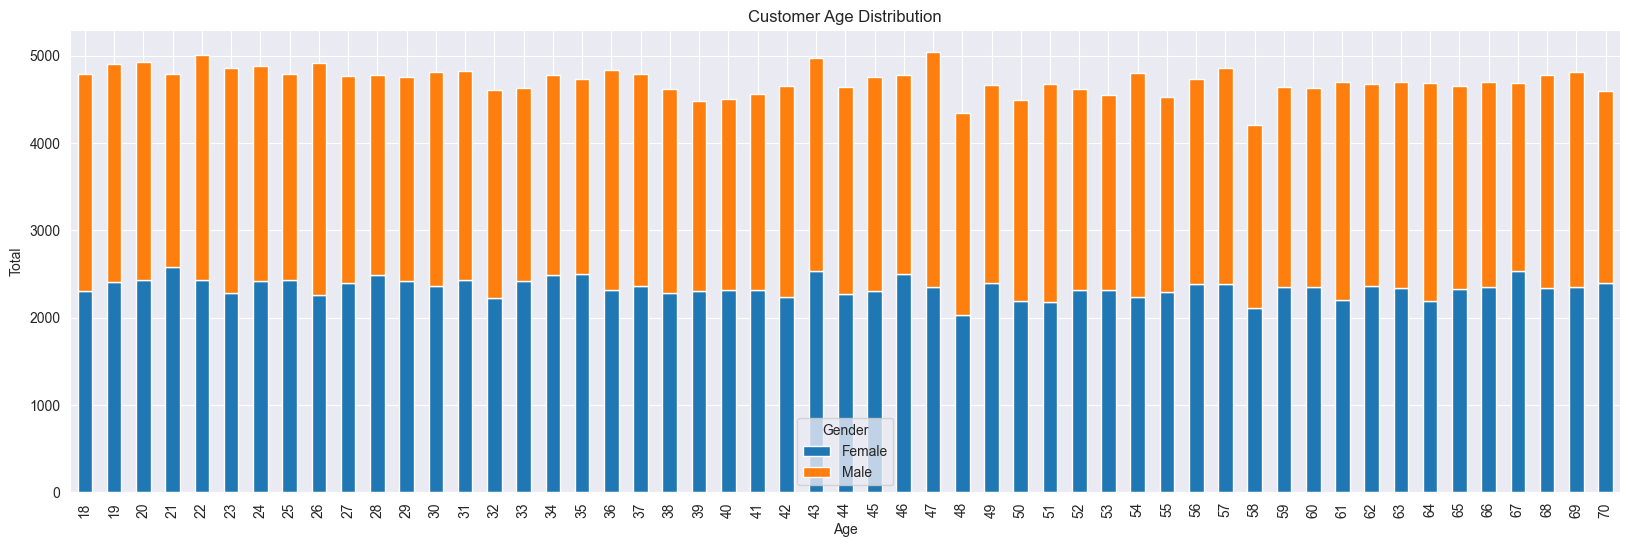

In [22]:
df_grouped = df.groupby(['Age', 'Gender']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Total') 
plt.show()

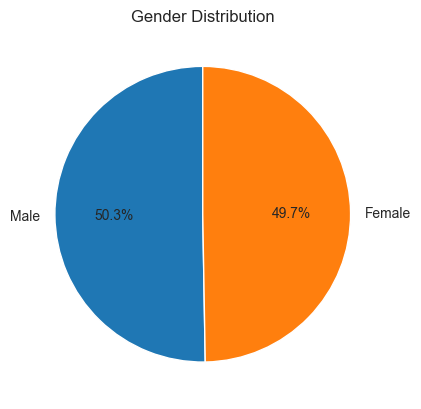

In [23]:
gender_distribution = df['Gender'].value_counts()
# gender_distribution
plt.plot(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

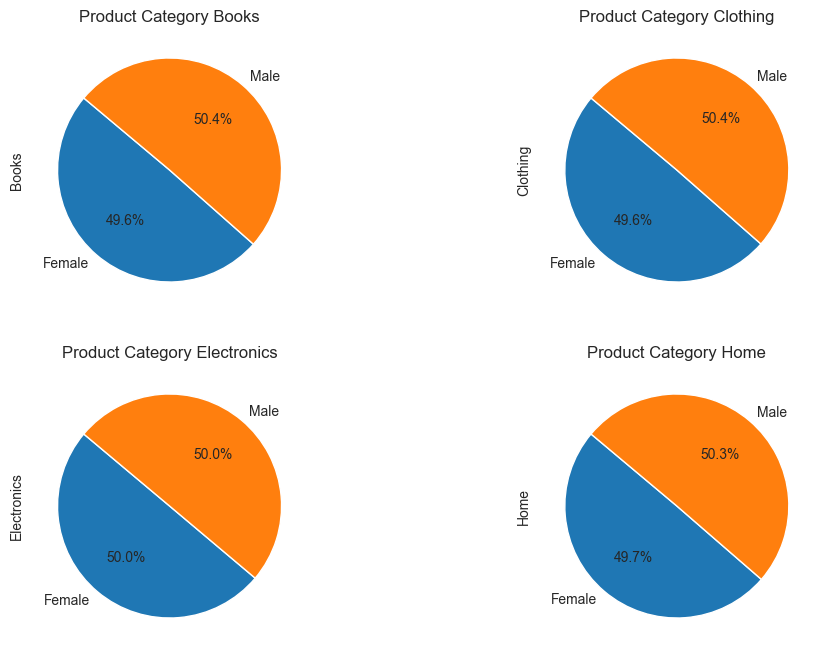

In [32]:
product_category_grouped = df.groupby(['Product Category', 'Gender']).size().unstack()
product_category_grouped.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%', startangle=90)
plt.suptitle('Product Distribution')
plt.show()

# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# axes = axes.flatten()
# 
# for i, (product, row) in enumerate(product_category_grouped.iterrows()):
#     row.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=140)
#     axes[i].set_title(f'Product Category {product}')
# 
# plt.show()

In [25]:
df_cloned = df.copy(deep=True)
df_cloned.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,1.0,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,573,Credit Card,1.0,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,205,Credit Card,0.0,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1850,Cash,1.0,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,24,Cash,0.0,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,160,Cash,0.0,Lauren Johnson,27,Female,0


In [26]:
df_cloned["Purchase Date"] = pd.to_datetime(df_cloned["Purchase Date"])

In [27]:
df_cloned["Purchase Date"] = df_cloned["Purchase Date"].dt.year

In [28]:
df_cloned

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023,Home,177,1,177,PayPal,1.0,John Rivera,31,Female,0
1,44605,2021,Electronics,174,3,522,PayPal,1.0,John Rivera,31,Female,0
2,44605,2020,Books,413,1,413,Credit Card,1.0,John Rivera,31,Female,0
3,44605,2023,Electronics,396,3,1188,Cash,0.0,John Rivera,31,Female,0
4,44605,2021,Books,259,4,1036,PayPal,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023,Home,436,1,436,Cash,0.0,Gabriel Williams,63,Male,0
249996,20455,2021,Electronics,233,1,233,Credit Card,1.0,Barry Foster,66,Female,0
249997,28055,2022,Electronics,441,5,2205,Cash,0.0,Lisa Johnson,63,Female,0
249998,15023,2021,Electronics,44,2,88,Cash,1.0,Melissa Fernandez,64,Male,0
